In [1]:
%pylab inline
plt.style.use('bmh');

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
def do_plot(ds, name, figsize = (10, 8)):
    ds.plot(y=['obj_select_real', 'obj_trunc_real', 'obj_insert_real', 'src_insert_real', 'fsrc_insert_real'],
        style=['o', '1', 'x', '2', '+'], title=name, figsize=figsize)
    ds.plot(y=['obj_select_real', 'store_real'], style=['o', 'r+'], title=name, figsize=figsize)

def do_boxplot(ds, columns=['obj_select_real', 'store_real'], title="", bin=100, figsize = (10, 3)):
    ds['visit_bin'] = np.array(ds.index/bin, dtype=int64)*bin
    positions = sorted(set(np.array(ds.index/bin, dtype=int64)))
    for col in columns:
        ds.boxplot(col, by='visit_bin', positions=positions,
                   figsize=figsize, showmeans=True, sym='x', whis='range')
        plt.title("")
        plt.suptitle(title + ': ' + col)

    
def do_plots(file_name, title, bin=100, filter_count=True):
    ds = pd.read_csv(file_name, header=0, index_col='visit')
    if filter_count:
        # filter out records doing COUNT(*) which takes long time
        ds = ds[ds.src_count.isnull()]
    
    # do "scatter" plot
    do_plot(ds, title)
    
    # box plots
    do_boxplot(ds, title=title, bin=bin)
    do_boxplot(ds, ['obj_trunc_real', 'obj_insert_real', 'src_insert_real', 'fsrc_insert_real'], 
               title=title, bin=bin, figsize=(10,3))

Baseline Schema
===============

First try is using baselien schema (and index) as defined currently by `cat` package.

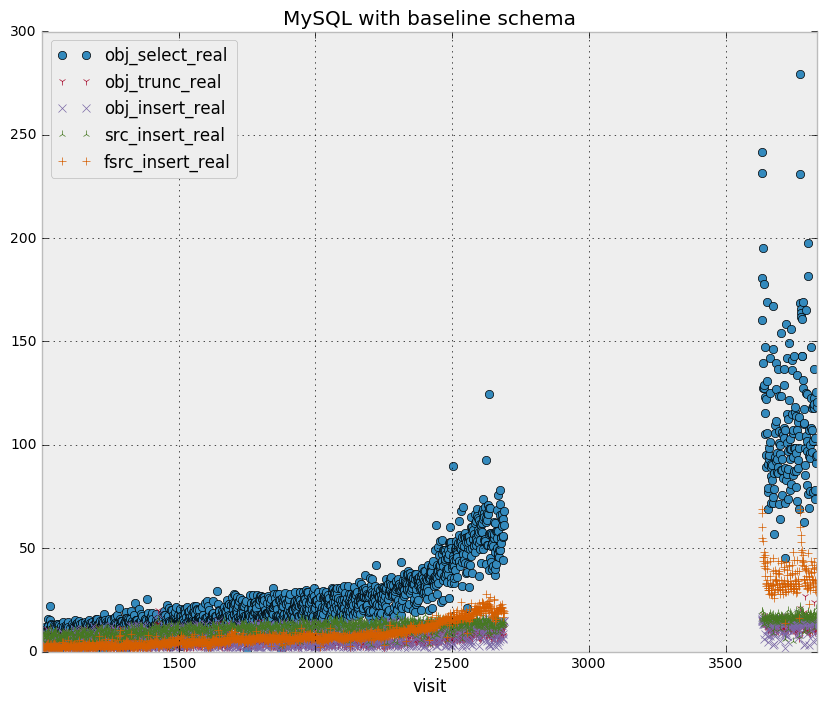

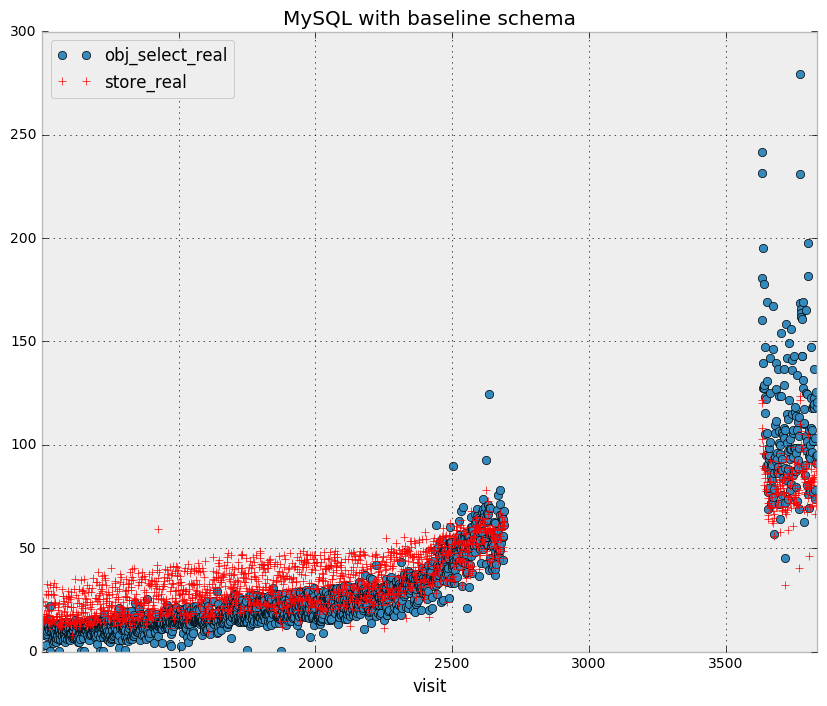

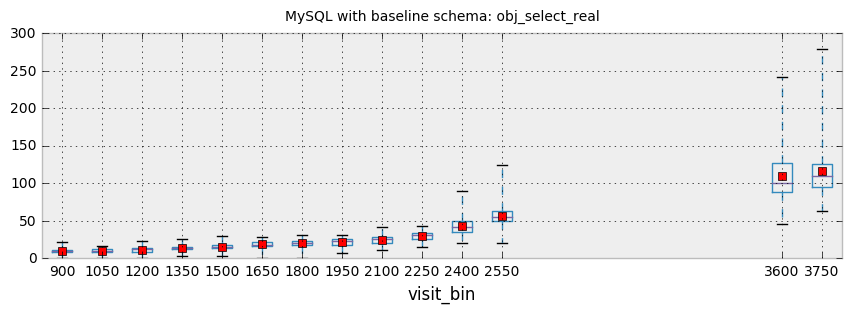

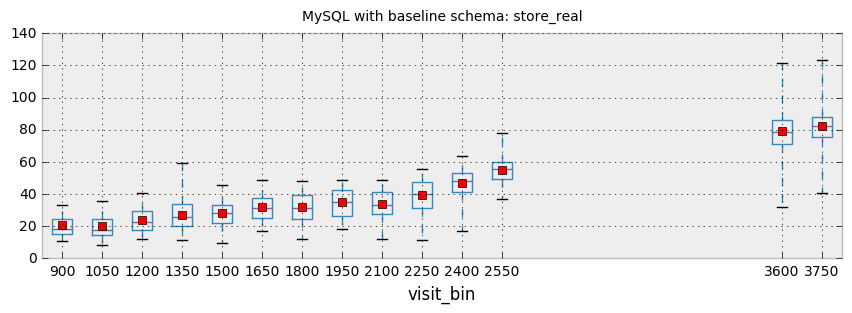

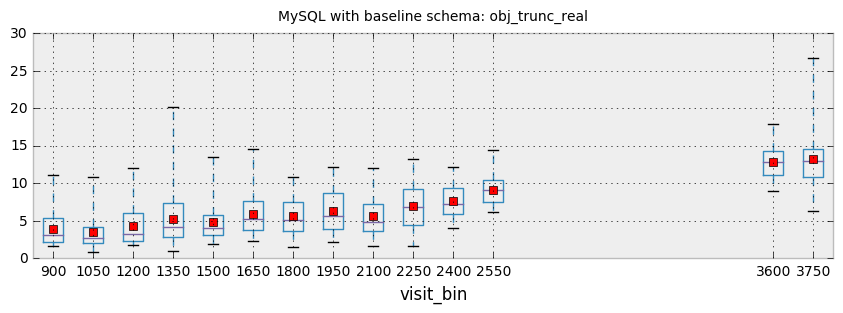

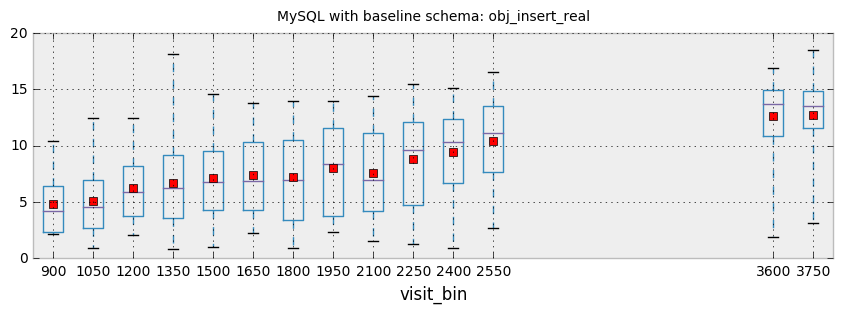

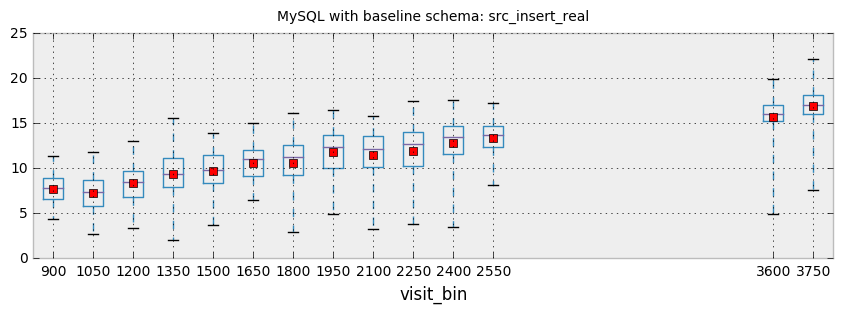

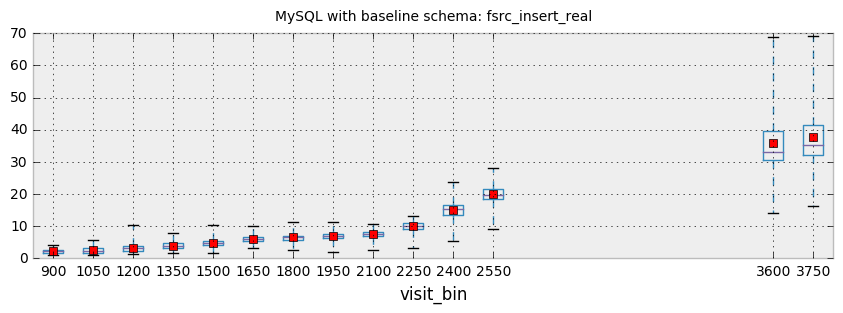

In [4]:
do_plots("data/log-mysql-baseline.csv.gz", "MySQL with baseline schema", bin=150)

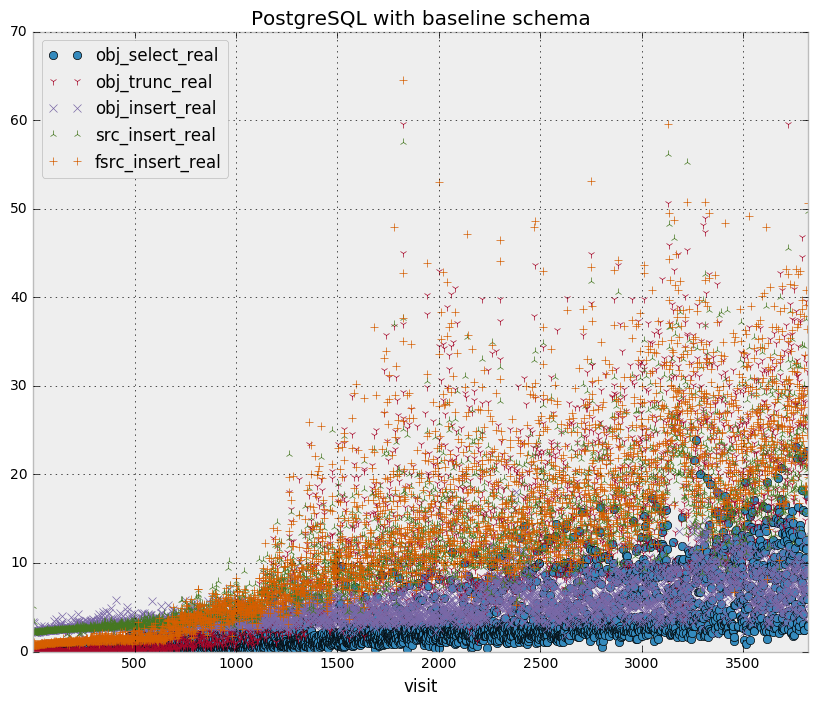

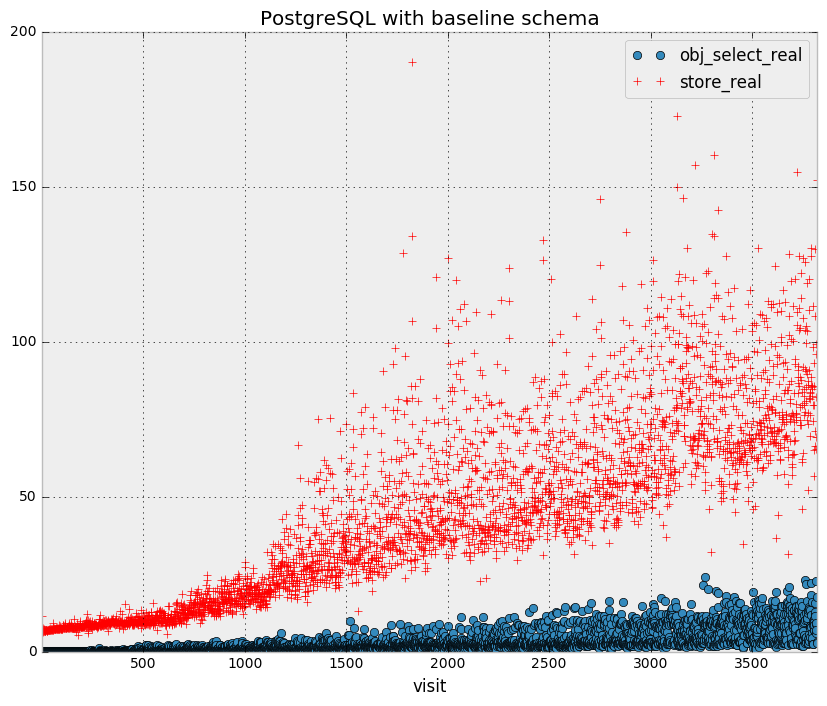

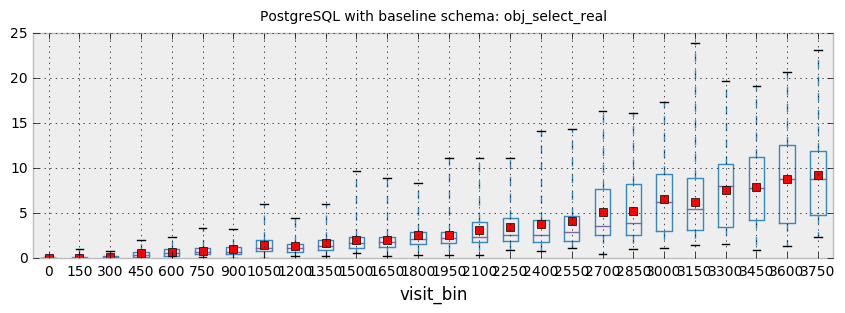

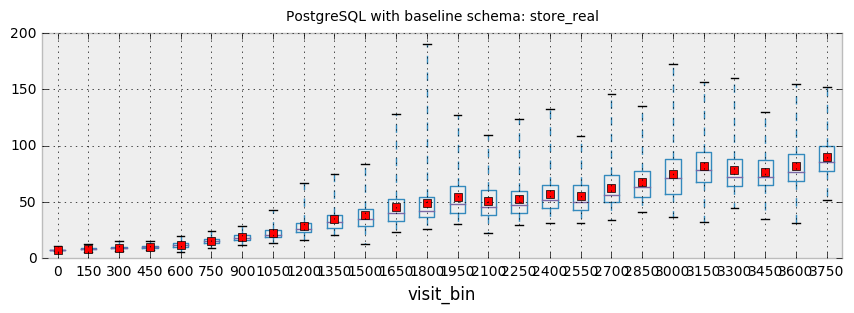

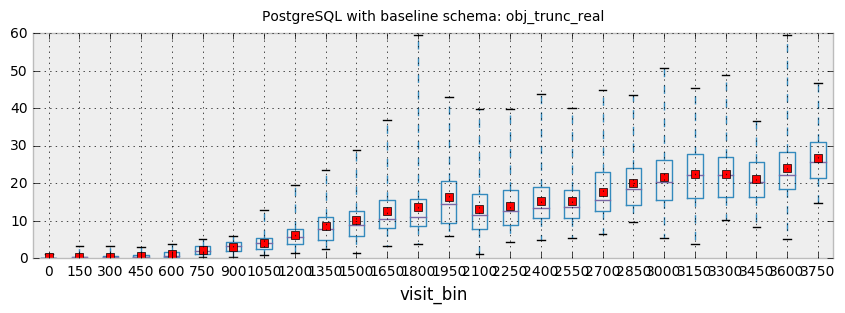

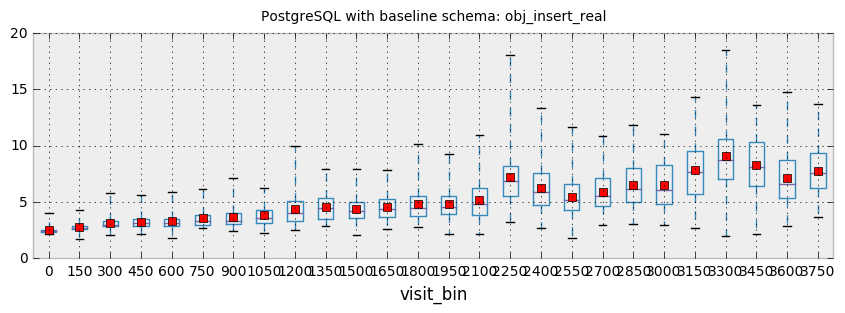

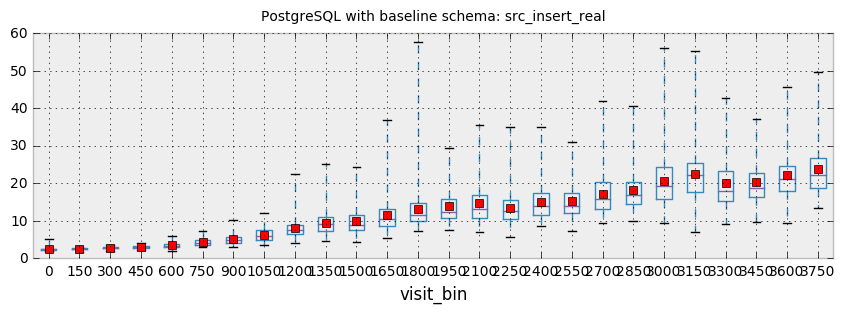

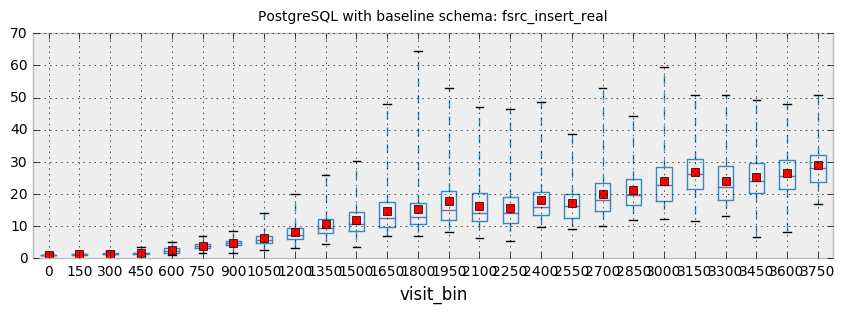

In [5]:
do_plots("data/log-pg-baseline.csv.gz", "PostgreSQL with baseline schema", bin=150)

Change DiaObject index
======================

Try to improve locality of the data in DiaObject table by changing its PK to be (htmId20, diaObjectId, validityStart) instead of  (diaObjectId, validityStart).

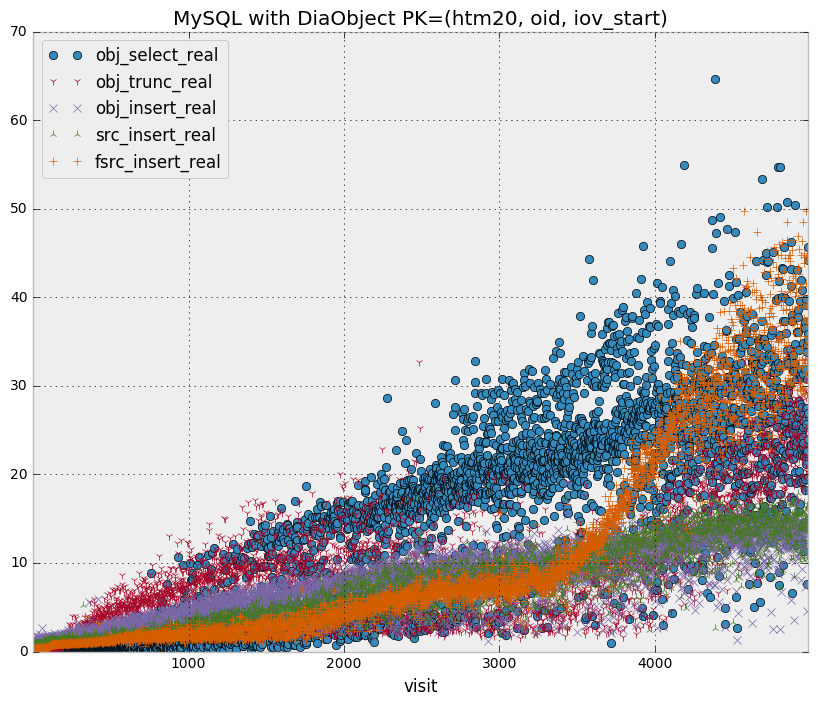

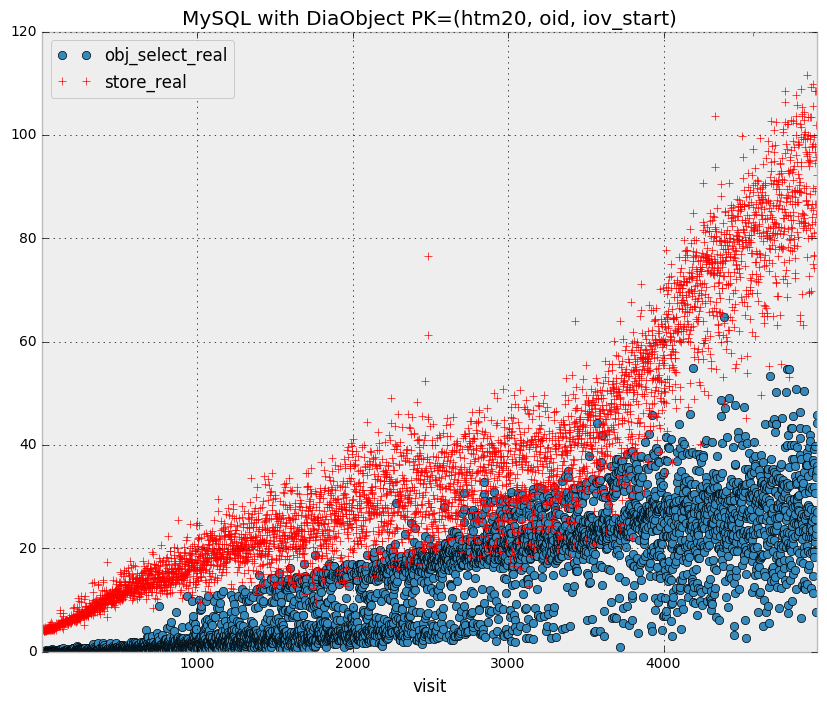

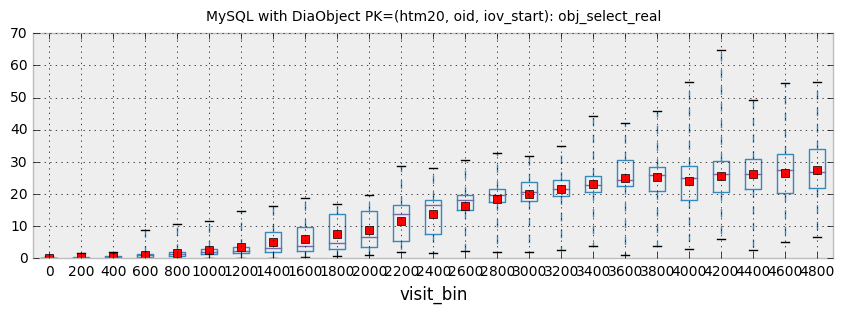

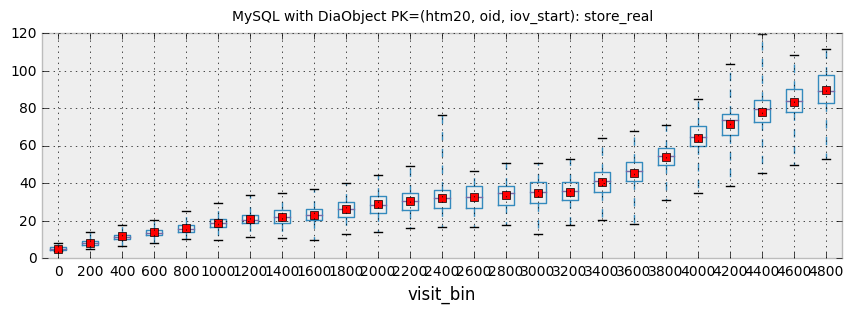

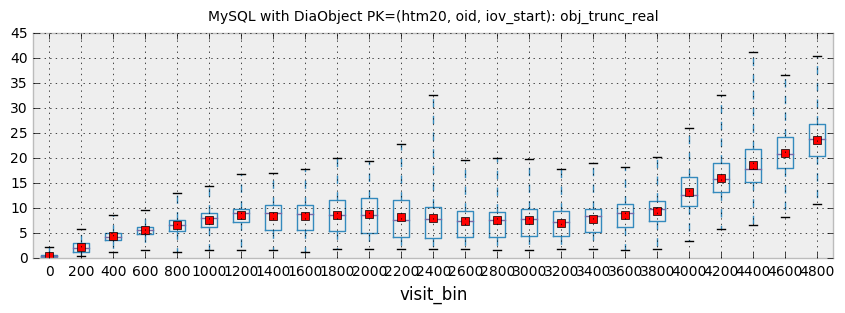

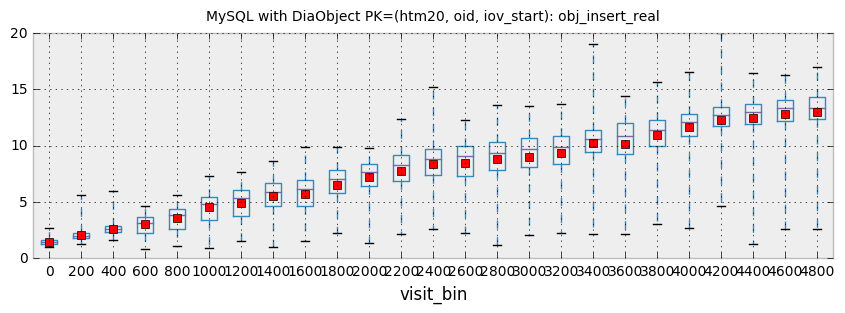

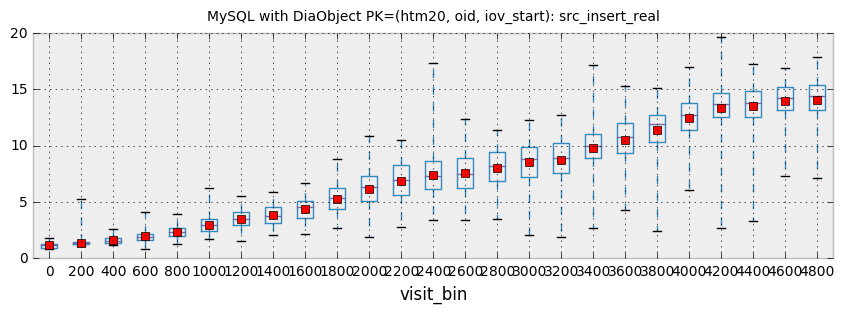

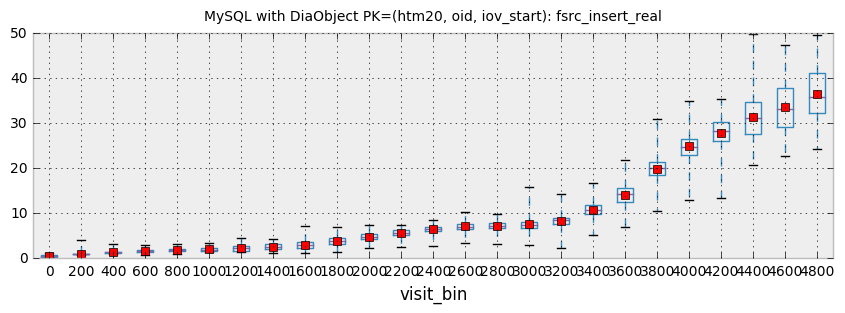

In [6]:
do_plots("data/log-mysql-idx_htm.csv.gz", "MySQL with DiaObject PK=(htm20, oid, iov_start)", bin=200)

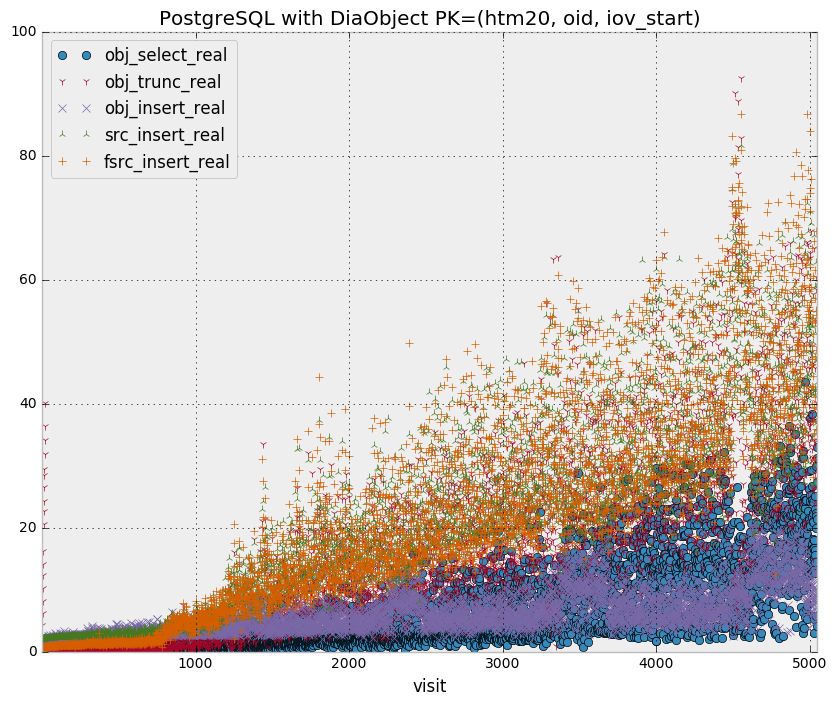

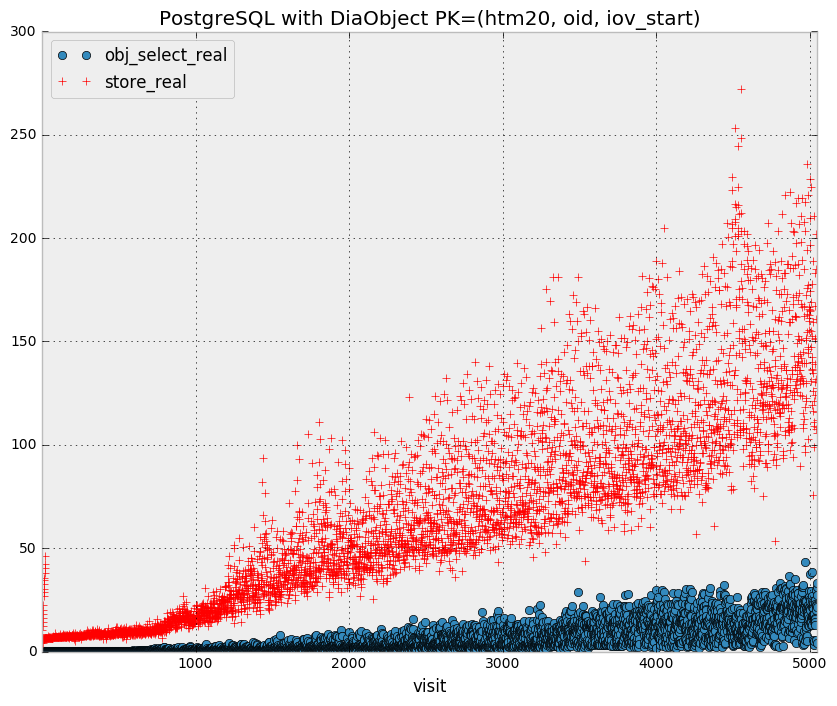

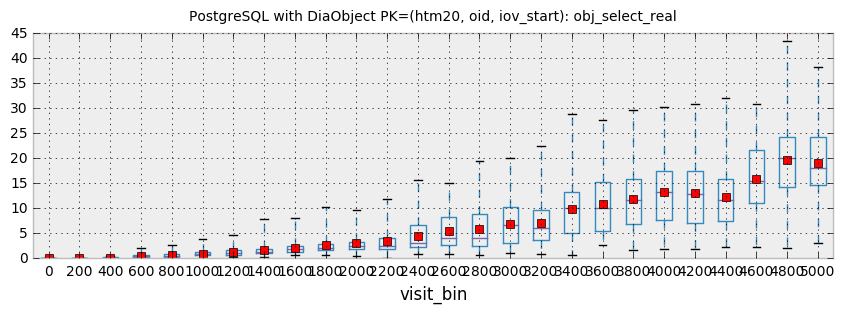

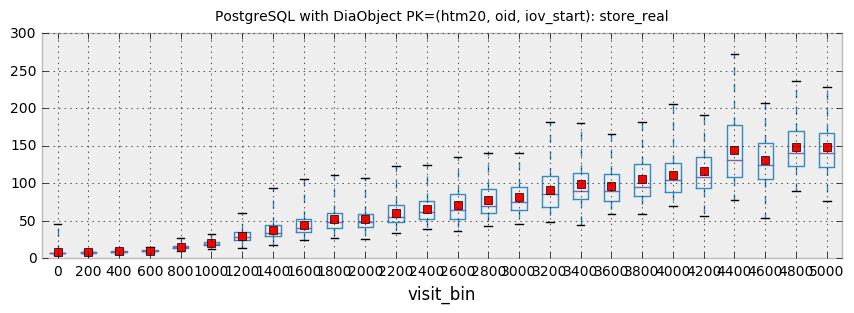

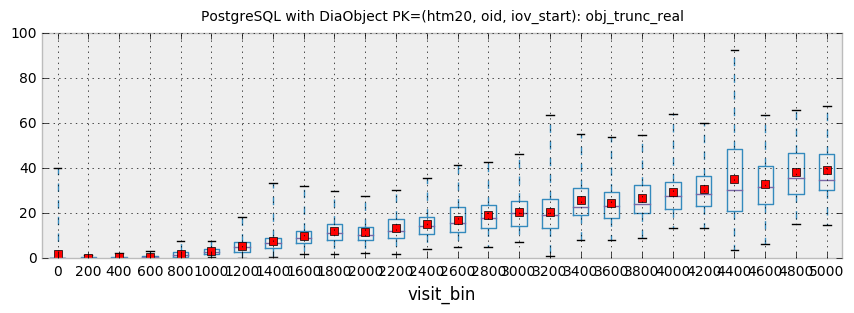

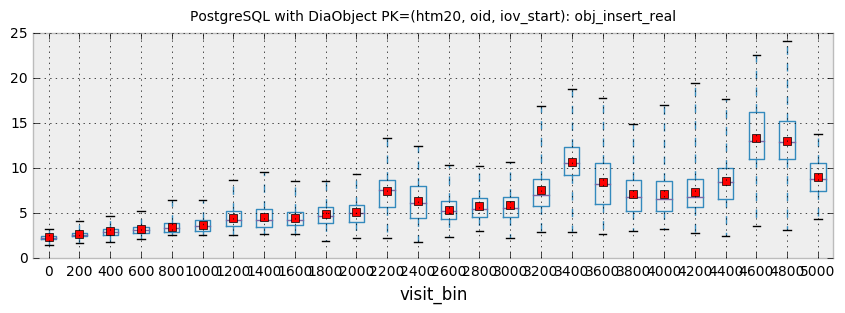

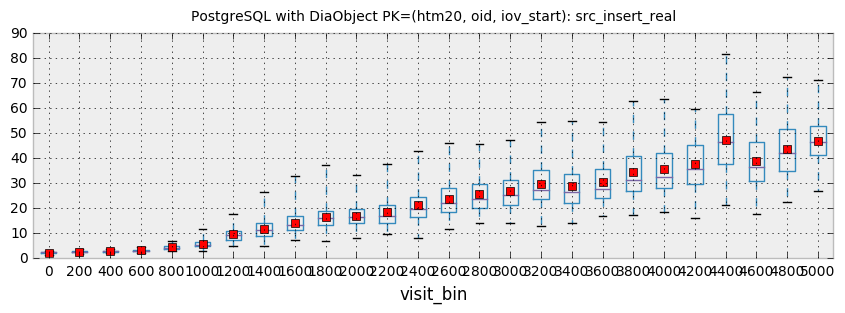

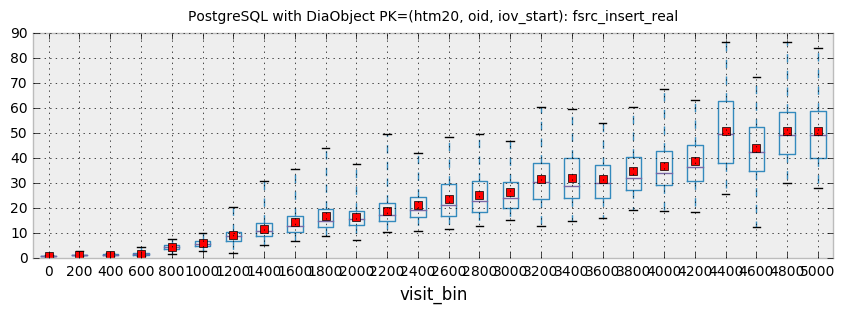

In [7]:
do_plots("data/log-pg-idx_htm.csv.gz", "PostgreSQL with DiaObject PK=(htm20, oid, iov_start)", bin=200)